In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
# from tensorflow import keras
# from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
# from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading emoji dataset
import random
%pylab inline
plt.figure(figsize=(20,20))
test_folder='/content/drive/MyDrive/Emoji_Dataset'
folder = ['sun','laugh','smile','heart','croissant','cloud','checkmark']
for i in range(len(folder)):
    path = os.path.join(test_folder,folder[i])
    file = random.choice(os.listdir(path))
    image_path= os.path.join(path, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,7,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


FileNotFoundError: ignored

<Figure size 1440x1440 with 0 Axes>

In [ ]:
IMG_HEIGHT = 28
IMG_WIDTH = 28


In [ ]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path,cv2.IMREAD_GRAYSCALE)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

img_data, class_name =create_dataset(test_folder)

In [ ]:
#converting list to numpy array
img_data = np.array(img_data)

In [ ]:
#printing the image
def show(img):
  img = img.reshape(28,28)
  plt.imshow(img , cmap = 'gray')

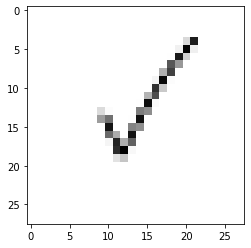

In [ ]:
#printing the image obtained from the img_data
plt.imshow(img_data[0],cmap = 'gray')

In [ ]:
#converting string class name to integer labels
target_dict={'checkmark':1 , 'cloud':2 , 'croissant':3, 'heart':4, 'laugh':5, 'smile':6 , 'sun':7}
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [ ]:
def img_preprocess(img):
  #noise removal
  img_blur = cv2.GaussianBlur(img, (0,0), sigmaX=0.25, sigmaY=0.25)
  #thresholding the image
  img_blur = img_blur.astype('uint8') 
  img_thresh = cv2.threshold(img,240, 255, cv2.THRESH_BINARY_INV)

  return img_thresh[1]

In [ ]:
img_dataset = img_data.copy()
new_data = []
for img in img_dataset:
  img = img_preprocess(img)
  new_data.append(img)
new_data_1= np.array(new_data)
print(new_data_1.shape)

(354, 28, 28)


In [ ]:
from tqdm import tqdm


from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage

final_train_data = []
final_target_train = []

for i in tqdm(range(new_data_1.shape[0])):
    final_train_data.append(new_data_1[i])
    final_train_data.append(rotate(new_data_1[i], angle=45, mode = 'wrap'))
    final_train_data.append(np.fliplr(new_data_1[i]))
    final_train_data.append(random_noise(new_data_1[i],var=0.2**2))

    for j in range(4):
        final_target_train.append(target_val[i])

100%|██████████| 354/354 [00:00<00:00, 3335.30it/s]


In [ ]:
len(final_target_train), len(final_train_data)
final_train = np.array(final_train_data)
final_target_train = np.array(final_target_train)

In [ ]:
img_data= []
for i in range(final_train.shape[0]):
  img= final_train[i].reshape(784)
  img_data.append(img)
img_dataset = np.array(img_data)

NameError: ignored

(1416, 784)


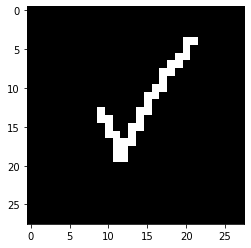

In [ ]:

#printing images after processing
print(img_dataset.shape)
show(img_dataset[0,:])

In [ ]:

# creating pandas dataframe
df = pd.DataFrame(img_dataset,columns=range(img_dataset.shape[1]))

In [ ]:
final_target_train = pd.Series(final_target_train)
# emoji_dataset = pd.concat([target_val,df], ignore_index=True, sort=False,axis = 1) 
df['class'] = final_target_train.values

(1416, 785)
Label : 2


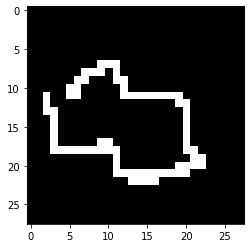

In [ ]:
print(df.shape)
#printing an image from the dataframe with its lable
print(f'Label : {df.iloc[200,784]}')
show(np.array(df.iloc[200,0:784]))

In [ ]:
#data augmentation
print(df.groupby('class')['class'].count())


class
1    200
2    200
3    200
4    204
5    208
6    204
7    200
Name: class, dtype: int64


### EMNIST DATASET

In [ ]:
data  = pd.read_csv('/content/drive/MyDrive/emnist-byclass-train.csv')

In [ ]:
data.shape

(697931, 785)

Index(['35', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.466', '0.467', '0.468', '0.469', '0.470', '0.471', '0.472', '0.473',
       '0.474', '0.475'],
      dtype='object', length=785)
35
0     34585
1     38374
2     34203
3     35143
4     33535
      ...  
57     2910
58     2697
59     2822
60     2365
61     2725
Name: 35, Length: 62, dtype: int64
Label : 6


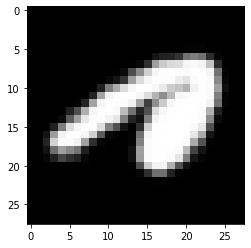

In [ ]:
#printing an image from the dataset
print(data.columns)
print(data.groupby('35')['35'].count())
print(f'Label : {data.iloc[1,0]}')
show(np.array(data.iloc[1,1:785]))

In [ ]:
def emnist_data_preprocessing(img):
  img=img.reshape(28,28)
  img = img.astype('uint8')
  thresh = cv2.threshold(img,150, 255, cv2.THRESH_BINARY)
  w = 28
  h = 28
  center = (w/2, h/2)
  rotation_mat = cv2.getRotationMatrix2D( center, -90, 1)     #anti-clockwise direction
  img_rotated = cv2.warpAffine(thresh[1], rotation_mat, (w,h))    #warpAffine does appropriate shifting
  image = cv2.flip(img_rotated, 1)
  img_final = image.reshape(784)
  return img_final


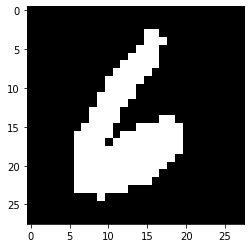

In [ ]:
#checking wether our image preprocessing is working or not
img = np.array(data.iloc[1,1:785])
show(img)
img = emnist_data_preprocessing(img)
show(img)


In [ ]:
#analyizing the dataset and removing numbers from the dataset
print(data.columns)

Index(['35', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.466', '0.467', '0.468', '0.469', '0.470', '0.471', '0.472', '0.473',
       '0.474', '0.475'],
      dtype='object', length=785)


In [ ]:
print(data.groupby('35')['35'].count())

35
0     34585
1     38374
2     34203
3     35143
4     33535
      ...  
57     2910
58     2697
59     2822
60     2365
61     2725
Name: 35, Length: 62, dtype: int64


In [ ]:
#dropping integer class
data
drop_data =[0,1,2,3,4,5,6,7,8,9,18,21,23,24,26,28,30,31,34,35,36,38,39,41,42,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]

for i in drop_data:

  data = data.drop(data[data['35'] == i].index)

In [ ]:
data.shape

(129192, 785)

In [ ]:
print(data.groupby('35')['35'].count())

35
10     6407
11     3878
12    10094
13     4562
14     4934
15     9182
16     2517
17     3152
19     3762
20     2468
22     9002
25     8347
27     5073
29     9820
32     4695
33     2771
37     5159
40    24631
43     8738
Name: 35, dtype: int64


In [ ]:
#creating the dataset
emnist_img = []
for i in range(0,data.shape[0]):
  img = data.iloc[i,1:]
  img = img.to_numpy()
  img = emnist_data_preprocessing(img)
  emnist_img.append(img)

In [ ]:
#converting into numpy  array
emnist_img = np.array(emnist_img)
emnist_img.shape

(129192, 784)

29


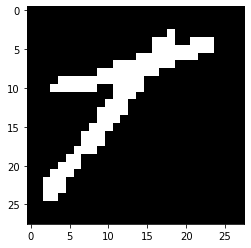

In [ ]:
#printing image from the emnist dataset
show(emnist_img[1][0:784])
print(data.iloc[1,0])

In [ ]:
# creating pandas dataframe
df2 = pd.DataFrame(emnist_img, columns =range(emnist_img.shape[1]) )

In [ ]:
print(df2.shape)
print(data['35'].shape)


(129192, 784)
(129192,)


In [ ]:

# letter_dataset = pd.concat([data['35']-2,df2], ignore_index=True, sort=False,) 
df2['class'] = data['35'].values-2


In [ ]:
print(df2.shape)
df2
print(df2.groupby('class')['class'].count())

(129192, 785)
class
8      6407
9      3878
10    10094
11     4562
12     4934
13     9182
14     2517
15     3152
17     3762
18     2468
20     9002
23     8347
25     5073
27     9820
30     4695
31     2771
35     5159
38    24631
41     8738
Name: class, dtype: int64


Label : 38


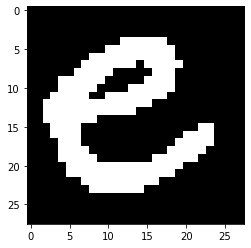

In [ ]:
#printing the image after formation of dataframe
print(f'Label : {df2.iloc[2,784]}')
show(np.array(df2.iloc[2,0:784]))

In [ ]:
print(df2.isna().sum())

0        0
1        0
2        0
3        0
4        0
        ..
780      0
781      0
782      0
783      0
class    0
Length: 785, dtype: int64


In [ ]:
type(df2)
print(df2['class'].dtype)
print(df2[0].dtype)

int64
uint8


In [ ]:
# emoji_k = pd.read_csv('/content/drive/MyDrive/Dataset/emoji_aug.csv')

In [ ]:
# emoji_k.head()
# print(type(emoji_k))
# print(emoji_k['class'].dtype)
# print(emoji_k['0'].dtype)
# print(emoji_k.columns)
# col = emoji_k.columns
# column = {classname in col to }
# emoji_k.rename(columns= {col : range(0,784)})
# # emoji_k.columns = emoji_k.columns.int64()

In [ ]:
# print(emoji_k.isna().sum())
# print(emoji_k.shape)
# print(df2.shape)

In [ ]:
result = pd.concat([df2,df],ignore_index = True)

In [ ]:
result.shape

(130608, 785)

In [ ]:
result


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,20
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,27
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,38
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,41
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130603,0.037524,0.040320,0.293352,0.000000,0.001093,0.0,0.259291,0.031505,0.0,0.157186,...,0.000000,0.0,0.000000,0.0,0.0,0.013243,0.022802,0.067671,0.000000,7
130604,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,7
130605,0.000000,52.812180,233.124359,96.563217,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,127.500000,7
130606,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,7


In [ ]:
# result = result.dropna()
result.isna().sum()

0        0
1        0
2        0
3        0
4        0
        ..
780      0
781      0
782      0
783      0
class    0
Length: 785, dtype: int64

In [ ]:
result.shape

(130608, 785)

In [ ]:
result= result.sample(frac=1).reset_index(drop=True)


In [ ]:
print(result.groupby('class')['class'].count())

class
1       200
2       200
3       200
4       204
5       208
6       204
7       200
8      6407
9      3878
10    10094
11     4562
12     4934
13     9182
14     2517
15     3152
17     3762
18     2468
20     9002
23     8347
25     5073
27     9820
30     4695
31     2771
35     5159
38    24631
41     8738
Name: class, dtype: int64


In [ ]:
result.shape

(130608, 785)

In [ ]:
result.to_csv('char_dataset.csv' , index = False)